In [2]:
import pandas as pd
import numpy as np
!pip install eli5
import os
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=7d456a5c195909f1c00839820d608bb62a3934a6fee08f1dfd1e1c3b8df53949
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
os.getcwd()

'/content'

In [4]:
#importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/sainikhilreddychalla/DataScience-Engineering-Methods/main/Hotel_Reservations.csv")

In [5]:
# Installing and Initializing H2O
! pip install h2o
# Importing libraries that we are going to use in this project
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import io
from h2o.estimators import H2ORandomForestEstimator
from sklearn.ensemble import RandomForestRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=eb794a59a8239929544faf5e5b842b35ce470c0d89b59581970b3458a3228084
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [6]:
# Settings for the number of threads and maximum memory
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4ebmxorm
  JVM stdout: /tmp/tmp4ebmxorm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4ebmxorm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_poxg7l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
#Dropping Booking_ID column
df = df.drop('Booking_ID', axis=1)
# Convert avg_price_per_room to int
df['avg_price_per_room'] = df['avg_price_per_room'].astype('int64')

In [9]:
# Checking the dataype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          36275 non-null  int64 
 1   no_of_children                        36275 non-null  int64 
 2   no_of_weekend_nights                  36275 non-null  int64 
 3   no_of_week_nights                     36275 non-null  int64 
 4   type_of_meal_plan                     36275 non-null  object
 5   required_car_parking_space            36275 non-null  int64 
 6   room_type_reserved                    36275 non-null  object
 7   lead_time                             36275 non-null  int64 
 8   arrival_year                          36275 non-null  int64 
 9   arrival_month                         36275 non-null  int64 
 10  arrival_date                          36275 non-null  int64 
 11  market_segment_type         

In [10]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94,0,Canceled


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and categorical features
numeric_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
                    'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
categorical_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Normalize numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encode categorical features
data = pd.get_dummies(df, columns=categorical_features)

data.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,0.50,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0.50,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0,0,0,0,0,0,0,1,0,1
2,0.25,0.0,0.285714,0.058824,0.0,0.002257,1.0,0.090909,0.900000,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0.50,0.0,0.000000,0.117647,0.0,0.476298,1.0,0.363636,0.633333,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0.50,0.0,0.142857,0.058824,0.0,0.108352,1.0,0.272727,0.333333,0.0,...,0,0,0,0,0,0,0,1,1,0


### **Building the model**
To start build the model, we first divide the data into training and testing datasets.

In [15]:
np.random.seed(0)
df_train,df_test = train_test_split(data, test_size=0.3, random_state=100)
scaler= StandardScaler()

features=numeric_features + ['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Canceled', 'booking_status_Not_Canceled']

#scaling the training data(fitting the parameters and transforming the values)
df_train[features]=scaler.fit_transform(df_train[features])

#transforming the test data.We avoid fitting the values to prevent data leakage!
df_test[features]=scaler.transform(df_test[features])

In [23]:
model = sm.OLS(data['booking_status_Not_Canceled'], data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     booking_status_Not_Canceled   R-squared:                       0.346
Model:                                     OLS   Adj. R-squared:                  0.346
Method:                          Least Squares   F-statistic:                     711.7
Date:                         Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                                 00:18:26   Log-Likelihood:                -16319.
No. Observations:                        36275   AIC:                         3.269e+04
Df Residuals:                            36247   BIC:                         3.293e+04
Df Model:                                   27                                         
Covariance Type:                     nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.0466      0.018     -2.555      0.011      -0.082      -0.011
no_of_children                          -0.2937      0.070     -4.199      0.000      -0.431      -0.157
no_of_weekend_nights                    -0.1283      0.017     -7.742      0.000      -0.161      -0.096
no_of_week_nights                       -0.1162      0.025     -4.618      0.000      -0.165      -0.067
required_car_parking_space               0.1534      0.012     13.101      0.000       0.130       0.176
lead_time                               -1.1235      0.012    -92.707      0.000      -1.147      -1.100
arrival_year                            -0.0511      0.006     -8.238      0.000      -0.063      -0.039
arrival_month                            0.0511      0.008      6.336      0.000       0.035       0.067
arrival_date                            -0.0073      0.007     -1.062      0.288      -0.021       0.006
repeated_guest                           0.0021      0.017      0.127      0.899      -0.031       0.035
no_of_previous_cancellations             0.1312      0.082      1.604      0.109      -0.029       0.292
no_of_previous_bookings_not_canceled    -0.2957      0.084     -3.532      0.000      -0.460      -0.132
avg_price_per_room                      -1.3694      0.044    -31.355      0.000      -1.455      -1.284
no_of_special_requests                   0.9879      0.014     69.718      0.000       0.960       1.016
type_of_meal_plan_Meal Plan 1         2.935e+11    2.1e+11      1.397      0.162   -1.18e+11    7.05e+11
type_of_meal_plan_Meal Plan 2         2.935e+11    2.1e+11      1.397      0.162   -1.18e+11    7.05e+11
type_of_meal_plan_Meal Plan 3         2.935e+11    2.1e+11      1.397      0.162   -1.18e+11    7.05e+11
type_of_meal_plan_Not Selected        2.935e+11    2.1e+11      1.397      0.162   -1.18e+11    7.05e+11
room_type_reserved_Room_Type 1       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 2       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 3       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 4       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 5       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 6       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
room_type_reserved_Room_Type 7       -2.947e+11   2.11e+11     -1.397      0.162   -7.08e+11    1.19e+11
market_segment_type_Aviation          1.223e

From the above output, we shall look at p-value. I shall be selecting only those features where p-value is less than 0.05.

So we can assume "no_of_adults" as a significant predictor.

# Finding correlation between variables
A response from ChatGPT say:

A correlation matrix is a table that displays the correlation coefficients between pairs of variables. Correlation coefficients measure the strength and direction of the linear relationship between two variables.

So we will run the following scripts to see and visualize the correlation between the variables.

In [24]:
# check the correlation matrix
data.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,...,-0.017421,0.047788,0.051244,-0.093975,-0.072766,-0.287651,-0.082993,0.242919,0.086920,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,...,0.005709,0.650342,0.113705,-0.015375,0.005196,-0.057469,-0.133710,0.154620,0.033078,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,...,-0.005147,0.013736,-0.005334,0.023590,-0.057646,-0.106703,-0.058901,0.116152,0.061563,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,...,-0.000491,0.014763,-0.002457,0.027162,-0.071314,-0.123045,-0.010714,0.080895,0.092996,-0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,...,-0.004131,0.035641,0.014747,0.005774,0.029095,0.084354,-0.102429,0.049616,-0.086185,0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,...,-0.025642,-0.046615,-0.037052,-0.054571,-0.088917,-0.179068,0.280103,-0.153570,0.438538,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,...,0.023266,0.018498,0.016766,0.027511,-0.047844,-0.042563,-0.163854,0.182180,0.179529,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,...,0.002081,0.006624,0.005736,-0.005816,0.010205,-0.025296,0.031059,-0.018776,-0.011233,0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,...,0.000141,0.018675,0.003816,-0.001594,-0.006916,0.002723,-0.014699,0.014280,0.010629,-0.010629
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,...,0.020904,-0.015997,0.044892,0.038084,0.195898,0.418850,-0.069139,-0.181371,-0.107287,0.107287


<Axes: >

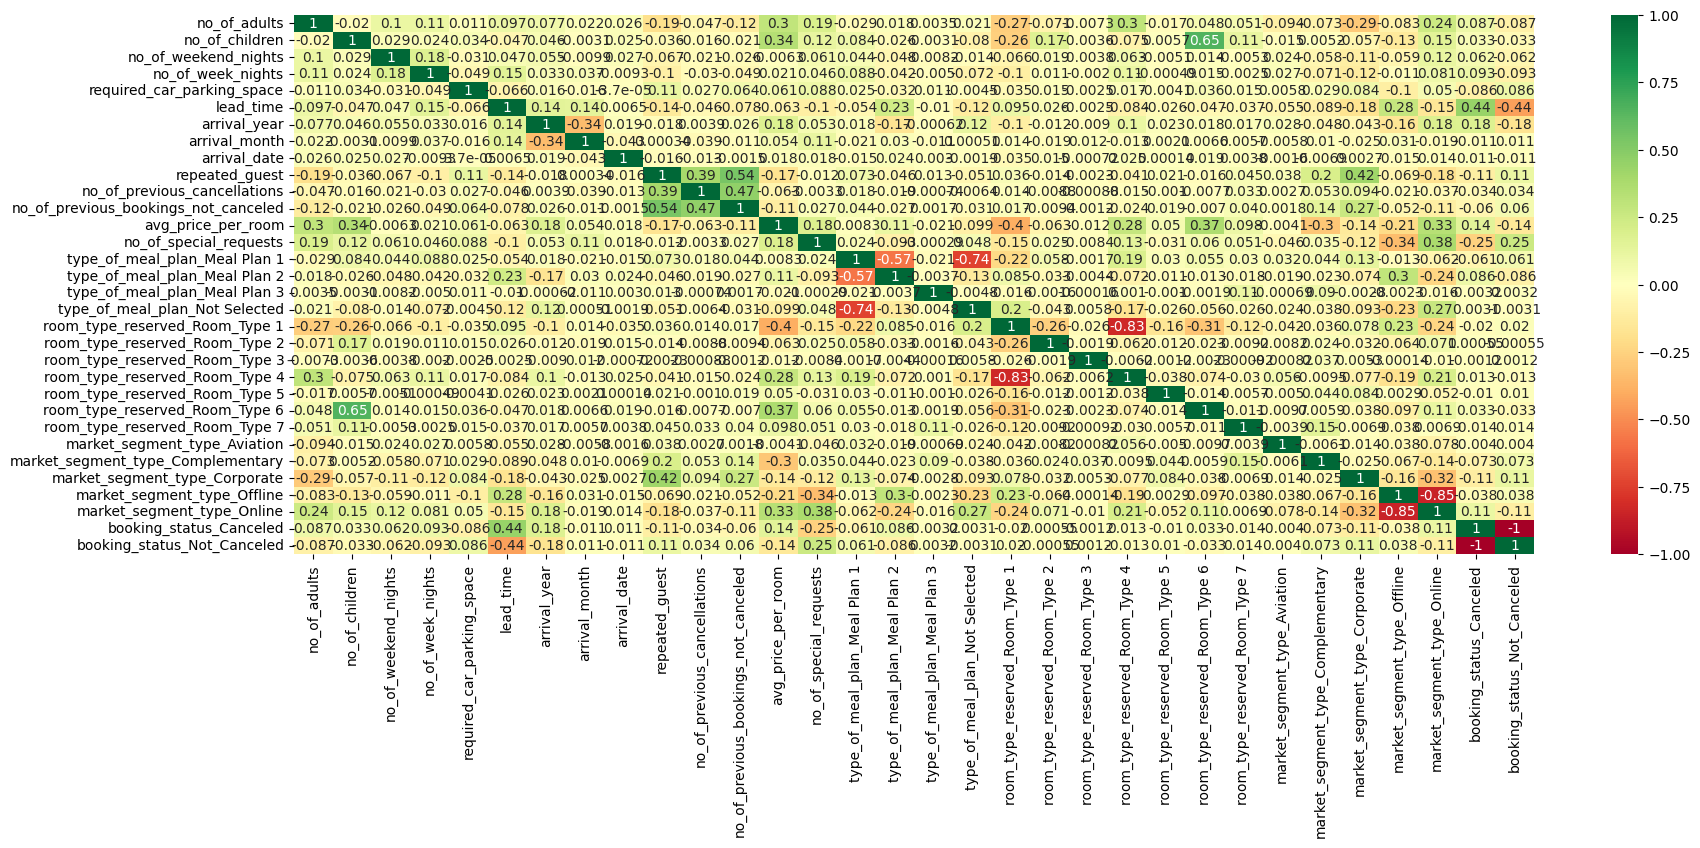

In [25]:
# visualizing the heat map of correlation matrix
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From the above results, we can say that "no_of_adults" has the best relation with "booking_status_Not_Canceled" inversely.

This means that when number of adults increases, the booking status might be inclined to get canceled.

# Importing Data
Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [26]:
data = h2o.H2OFrame(df)
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0.5,0,0.142857,0.117647,Meal Plan 1,0,Room_Type 1,0.505643,0,0.818182,0.0333333,Offline,0,0,0,0.12037,0,Not_Canceled
0.5,0,0.285714,0.176471,Not Selected,0,Room_Type 1,0.0112867,1,0.909091,0.166667,Online,0,0,0,0.196296,0.2,Not_Canceled
0.25,0,0.285714,0.0588235,Meal Plan 1,0,Room_Type 1,0.00225734,1,0.0909091,0.9,Online,0,0,0,0.111111,0,Canceled
0.5,0,0,0.117647,Meal Plan 1,0,Room_Type 1,0.476298,1,0.363636,0.633333,Online,0,0,0,0.185185,0,Canceled
0.5,0,0.142857,0.0588235,Not Selected,0,Room_Type 1,0.108352,1,0.272727,0.333333,Online,0,0,0,0.174074,0,Canceled
0.5,0,0,0.117647,Meal Plan 2,0,Room_Type 1,0.781038,1,0.727273,0.4,Online,0,0,0,0.212963,0.2,Canceled
0.5,0,0.142857,0.176471,Meal Plan 1,0,Room_Type 1,0.0767494,0,0.818182,0.466667,Online,0,0,0,0.198148,0.2,Not_Canceled
0.5,0,0.142857,0.176471,Meal Plan 1,0,Room_Type 4,0.187359,1,1,0.833333,Online,0,0,0,0.194444,0.2,Not_Canceled
0.75,0,0,0.235294,Meal Plan 1,0,Room_Type 1,0.273138,1,0.545455,0.166667,Offline,0,0,0,0.177778,0.2,Not_Canceled
0.5,0,0,0.294118,Meal Plan 1,0,Room_Type 4,0.0993228,1,0.818182,0.566667,Online,0,0,0,0.246296,0.6,Not_Canceled


# Studying Data

In [27]:
data.describe()

Rows:36275
Cols:18

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type,real,real,real,real,enum,int,enum,real,int,real,real,enum,int,real,real,real,real,enum
mins,0.0,0.0,0.0,0.0,,0.0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,
mean,0.4612405237767057,0.010527911784975884,0.1158176626956778,0.12966473426034789,,0.0309855272226051,,0.19239854821069968,0.8204272915230876,0.5839684230311382,0.48656650585802796,,0.02563749138525155,0.0017961087843927266,0.0026450248342403566,0.19103203410164124,0.12393108201240505,
maxs,1.0,1.0,1.0,1.0,,1.0,,1.0,1.0,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,
sigma,0.1296787094753227,0.040264806358927825,0.12437765925142828,0.08299440322494242,,0.17328084736891503,,0.19397475552874152,0.3838364395590785,0.27908131011143417,0.29134824562109646,,0.15805346903513284,0.028333188301522125,0.03024432261107998,0.06493739413761523,0.15724717967912163,
zeros,139,33577,16872,2387,,35151,,1297,6514,1014,1133,,35345,35937,35463,546,19777,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.5,0.0,0.14285714285714285,0.1176470588235294,Meal Plan 1,0.0,Room_Type 1,0.5056433408577877,0.0,0.8181818181818182,0.03333333333333333,Offline,0.0,0.0,0.0,0.12037037037037038,0.0,Not_Canceled
1,0.5,0.0,0.2857142857142857,0.1764705882352941,Not Selected,0.0,Room_Type 1,0.01128668171557562,1.0,0.9090909090909092,0.16666666666666669,Online,0.0,0.0,0.0,0.1962962962962963,0.2,Not_Canceled
2,0.25,0.0,0.2857142857142857,0.058823529411764705,Meal Plan 1,0.0,Room_Type 1,0.002257336343115124,1.0,0.09090909090909093,0.9,Online,0.0,0.0,0.0,0.11111111111111112,0.0,Canceled


# Splitting into training and testing sets

In [37]:
y = "booking_status"
x = data.columns

target=y

splits = data.split_frame(ratios=[0.75], seed=1)

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 27291
Rows in Test 8984


# H20 AutoML Execution
The max_runtime_secs argument provides a way to limit the AutoML run by time

In [41]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


## Interpreting the above results

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [42]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_2_AutoML_3_20240221_10449  0.949769   0.251782  0.973671                0.141133  0.278523  0.0775749
GBM_1_AutoML_3_20240221_10449                           0.947003   0.259542  0.972823                0.14409   0.282934  0.0800518
StackedEnsemble_BestOfFamily_1_AutoML_3_20240221_10449  0.94695    0.259614  0.972871                0.142028  0.283446  0.0803419
DRF_1_AutoML_3_20240221_10449                           0.945792   0.274643  0.970707                0.140892  0.280963  0.0789404
GBM_4_AutoML_3_20240221_10449                           0.941204   0.302576  0.969163                0.146462  0.296996  0.0882065
XGBoost_1_AutoML_3_20240221_10449                       0.940259   0.275205  0.969432                0.144984  0.292624  0.0856289
GBM_2_AutoML_3_20240221_10449                           0.939691   0.289141  0.9697

In [43]:
# predicting on test data
prediction = aml.leader.predict(test)
prediction.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,Canceled,Not_Canceled
Canceled,0.999644,0.000356116
Not_Canceled,0.0224928,0.977507
Not_Canceled,3.17051e-05,0.999968
Canceled,0.926604,0.0733965
Canceled,0.94229,0.0577096
Not_Canceled,0.00060682,0.999393
Canceled,0.999886,0.000113822
Canceled,0.99727,0.00273038
Not_Canceled,3.21856e-05,0.999968
Not_Canceled,0.0556526,0.944347


In [44]:
# Finding & storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model.algo

'stackedensemble'

In [45]:
# performance of the gbm model
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05192504098526069
RMSE: 0.22787066723310548
LogLoss: 0.17679459774912856
AUC: 0.9805270436523215
AUCPR: 0.9897974945867876
Gini: 0.9610540873046429
Null degrees of freedom: 8983
Residual degrees of freedom: 8980
Null deviance: 11375.4770886481
Residual deviance: 3176.6453323563414
AIC: 3184.6453323563414

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49313742585923914
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  --------------
Canceled      2549        402             0.1362   (402.0/2951.0)
Not_Canceled  227         5806            0.0376   (227.0/6033.0)
Total         2776        6208            0.07     (629.0/8984.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.493137     0.948615  224
max f2                       0.305494     0.968846  282
max f0point5                 0.726969     0.956338  149
max accuracy                 0.5586       0.929987  203
max precision                0.985284     0.999293  14
max recall                   0.000490583  1         398
max specificity              0.999932     0.999322  0
max absolute_mcc             0.582274     0.841431  197
max min_per_class_accuracy   0.653457     0.924094  174
max mean_per_class_accuracy  0.678398     0.924527  165
max tns                      0.999932     2949      0
max fns                      0.999932     3921      0
max fps                      9.44483e-05  2951      399
max tps                      0.000490583  6033      398
max tnr                      0.999932     0.999322  0
max fnr                      0.999932     0.649925  0
max fpr                      9.44483e-05  1         399
max tpr                      0.000490583  1         398

Gains/Lift Table: Avg response rate: 67.15 %, avg score: 67.17 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102404                   0.999993           1.48914     1.48914            1                0.999995     1                           0.999995            0.0152495       0.0152495                  48.9143   48.9143            0.0152495
2        0.0200356                   0.99999            1.48914     1.48914            1                0.999991     1                           0.999993            0.0145864       0.0298359                  48.9143   48.9143            0.0298359
3        0.0300534                   0.999987           1.48914     1.48914            1                0.999988     1                           0.999991            0.014918        0.0447539                  48.9143   48.9143            0.0447539
4        0.0400712                   0.999984           1.48914     1.48914            1                0.999985     1                           0.99999             0.014918        0.0596718                  48.9143   48.9143            0.0596718
5        0.050089                    0.999981           1.48914     1.48914            1                0.999982     1                           0.999988            0.014918        0.0745898                  48.9143   48.9143            0.0745898
6        0.101625                    0.999966           1.48914     1.48914            1                0.999974     1                           0.999981            0.0767446       0.151334                   48.9143   48.9143      

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_3_20240221_10449,0.98528,0.168363,0.991979,0.0645327,0.211767,0.0448453,4513,0.013456,DRF
StackedEnsemble_BestOfFamily_2_AutoML_3_20240221_10449,0.979973,0.177763,0.989563,0.0867429,0.2289,0.0523953,4707,0.065872,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20240221_10449,0.973591,0.197095,0.986464,0.0990291,0.243283,0.0591866,4174,0.080727,StackedEnsemble
GBM_1_AutoML_3_20240221_10449,0.973503,0.201507,0.986419,0.101013,0.245011,0.0600305,13836,0.06515,GBM
XGBoost_1_AutoML_3_20240221_10449,0.968484,0.213689,0.983559,0.103767,0.253176,0.0640983,11929,0.006869,XGBoost
GBM_4_AutoML_3_20240221_10449,0.961542,0.277439,0.980174,0.126877,0.280842,0.0788721,4196,0.017248,GBM
GBM_3_AutoML_3_20240221_10449,0.954078,0.275685,0.976345,0.133873,0.285435,0.081473,4190,0.016683,GBM
GBM_2_AutoML_3_20240221_10449,0.953058,0.270782,0.975903,0.132975,0.285214,0.0813473,4210,0.014362,GBM
XGBoost_2_AutoML_3_20240221_10449,0.936872,0.358384,0.966331,0.156669,0.321698,0.10349,4447,0.001933,XGBoost
GLM_1_AutoML_3_20240221_10449,0.863641,0.423889,0.925803,0.253825,0.370238,0.137076,2243,0.001505,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_2_AutoML_3_20240221_10449

,Canceled,Not_Canceled,Error,Rate
Canceled,10307.0,1578.0,0.1328,(1578.0/11885.0)
Not_Canceled,993.0,23397.0,0.0407,(993.0/24390.0)
Total,11300.0,24975.0,0.0709,(2571.0/36275.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

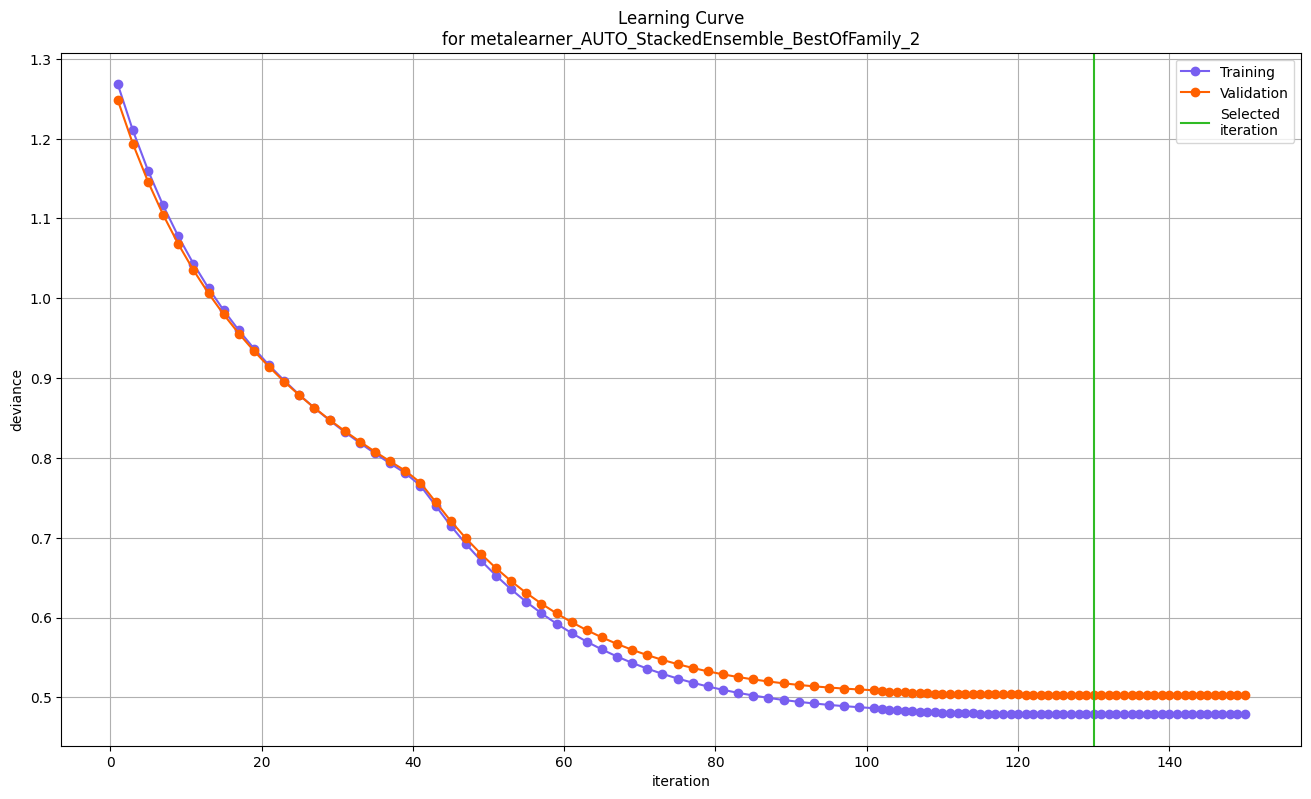

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

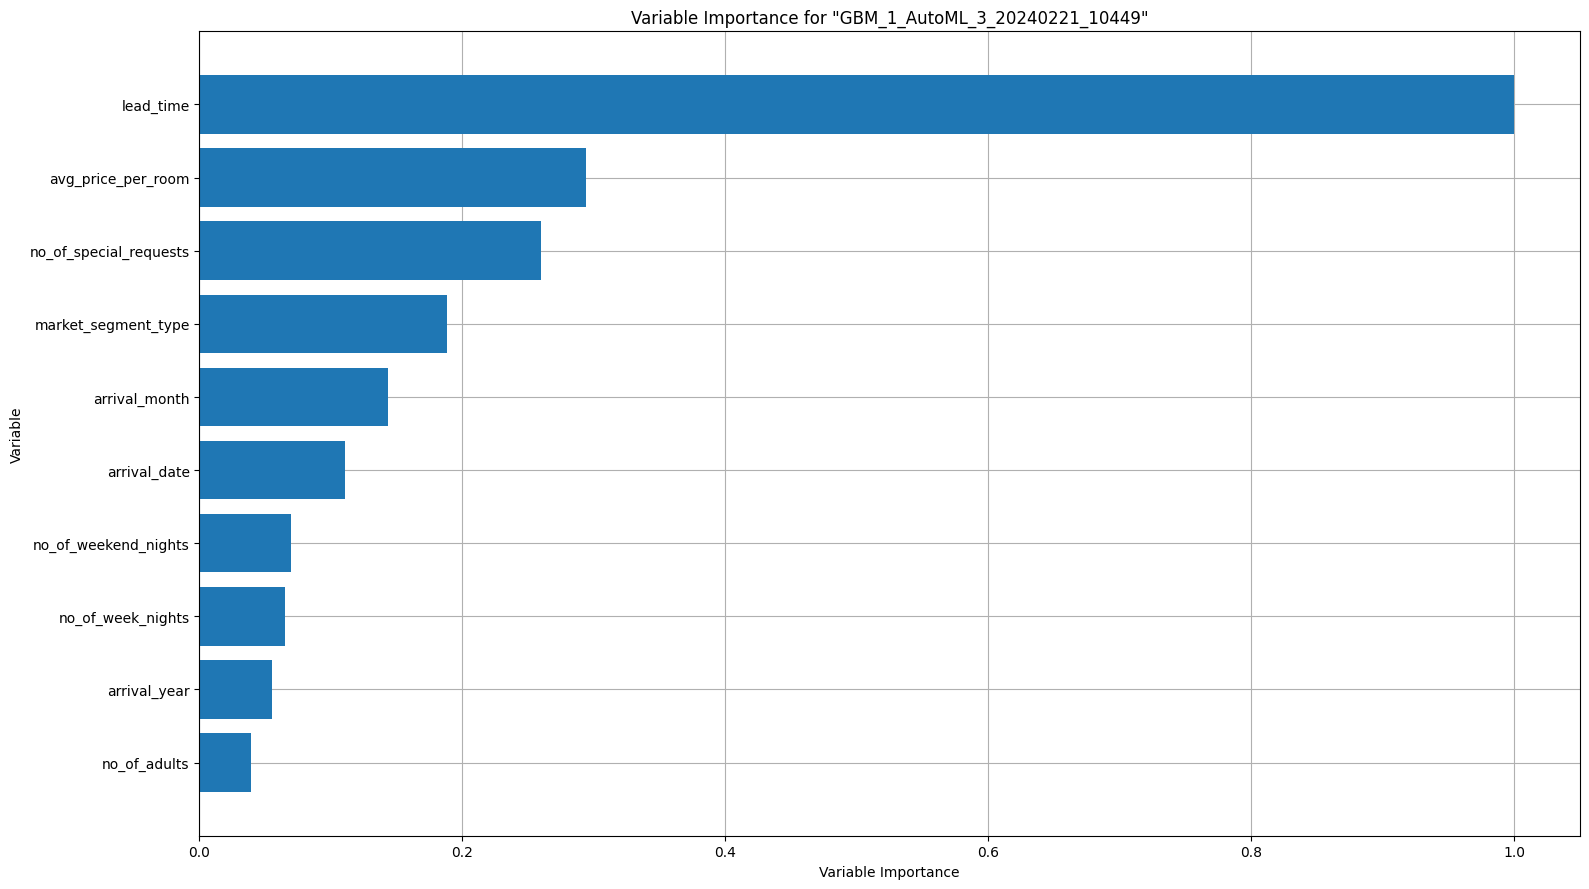

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

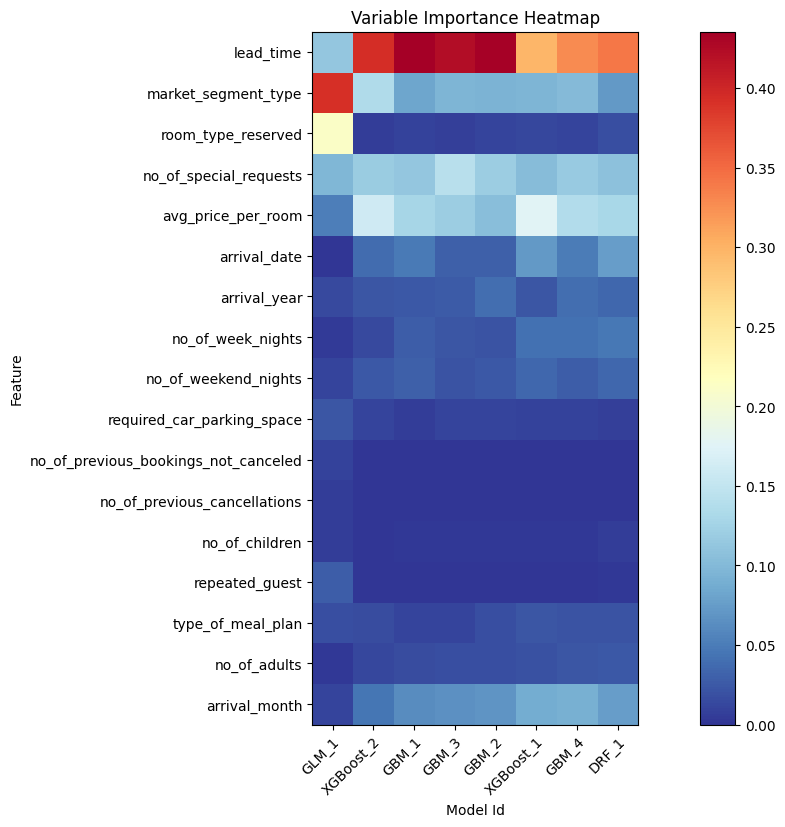

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

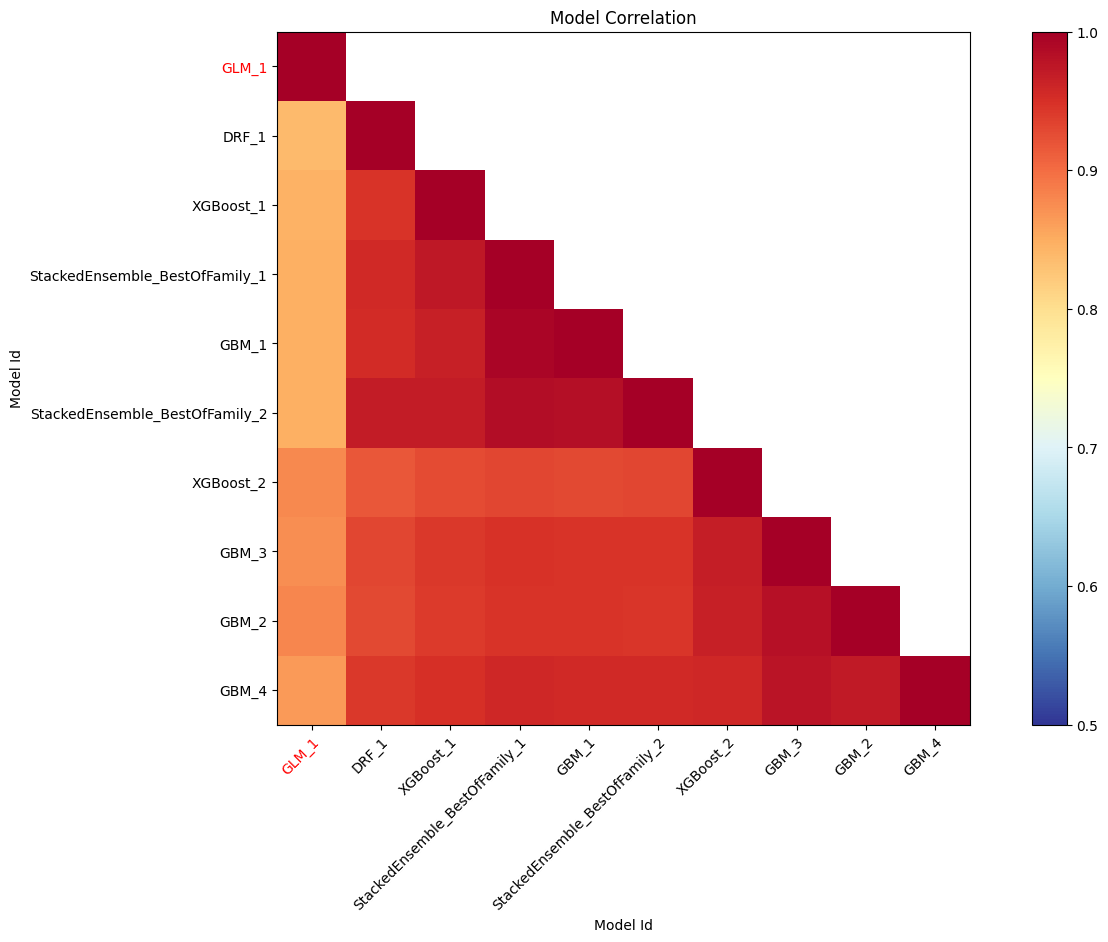

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

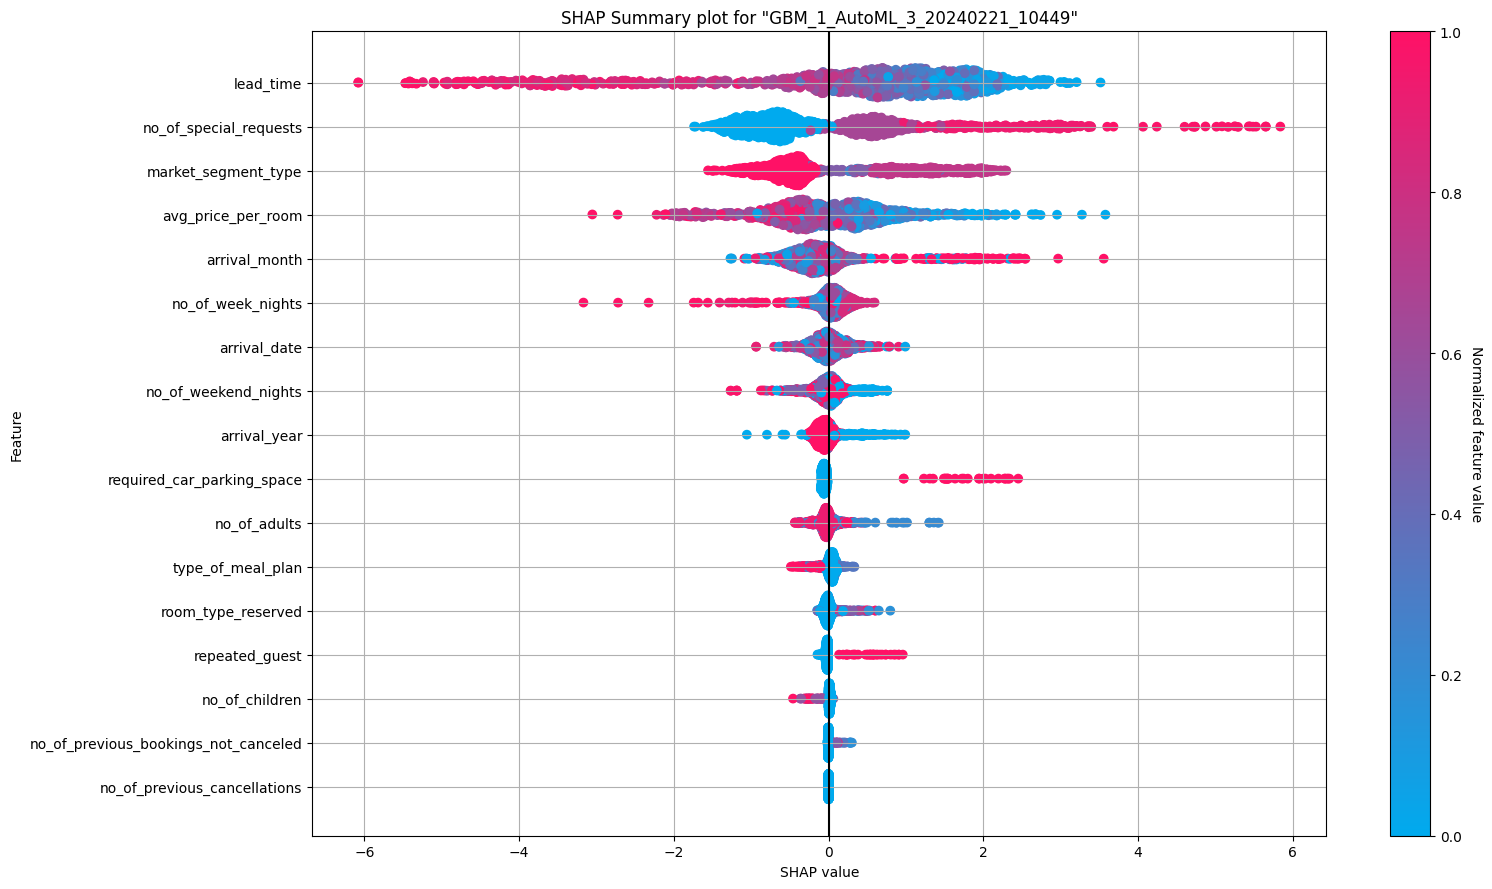

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

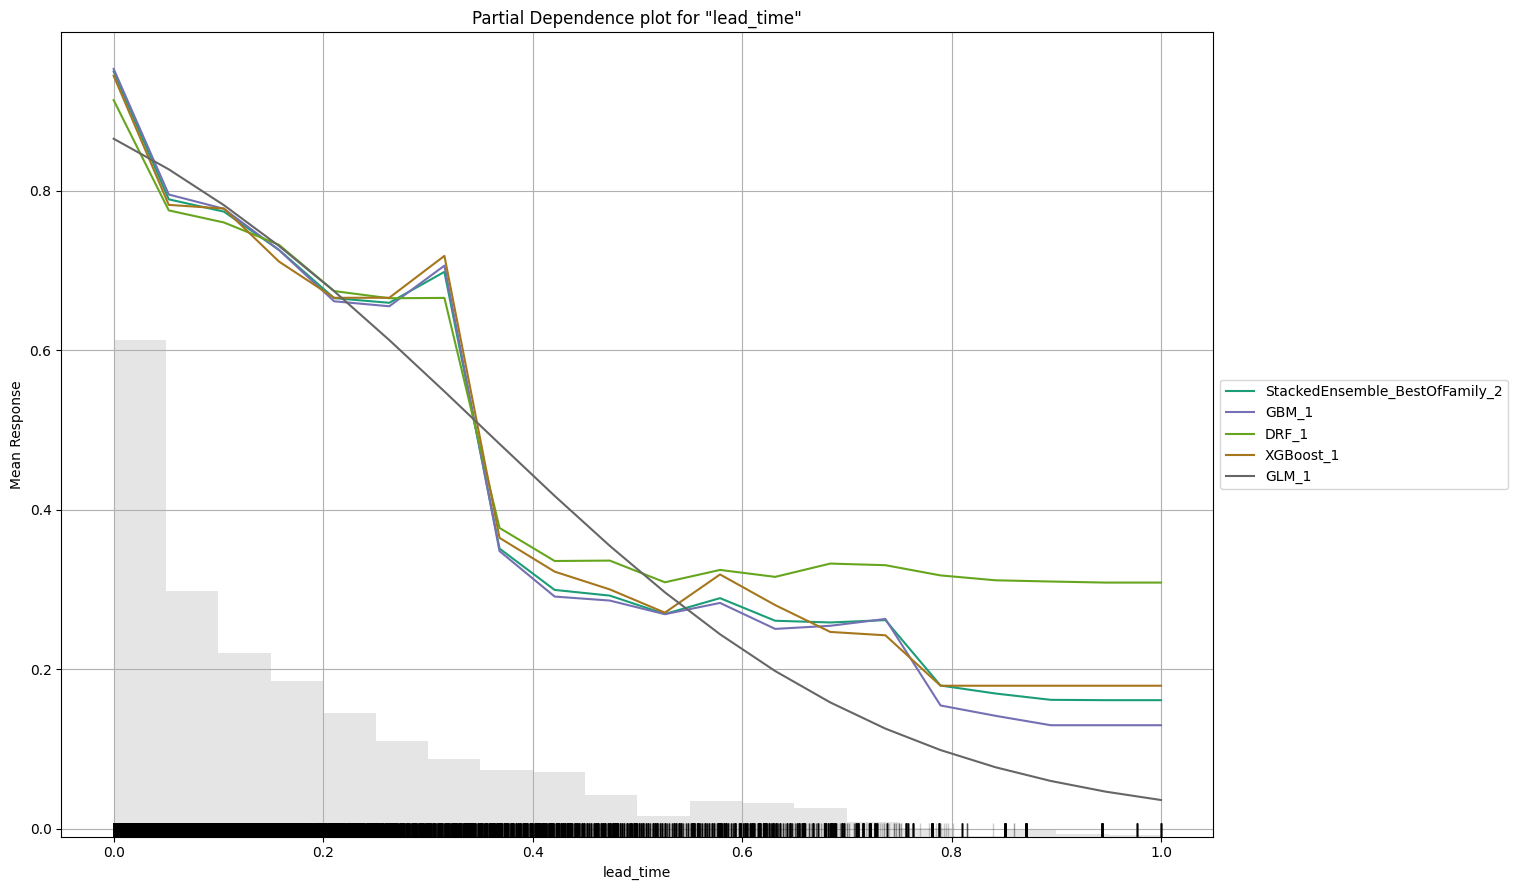

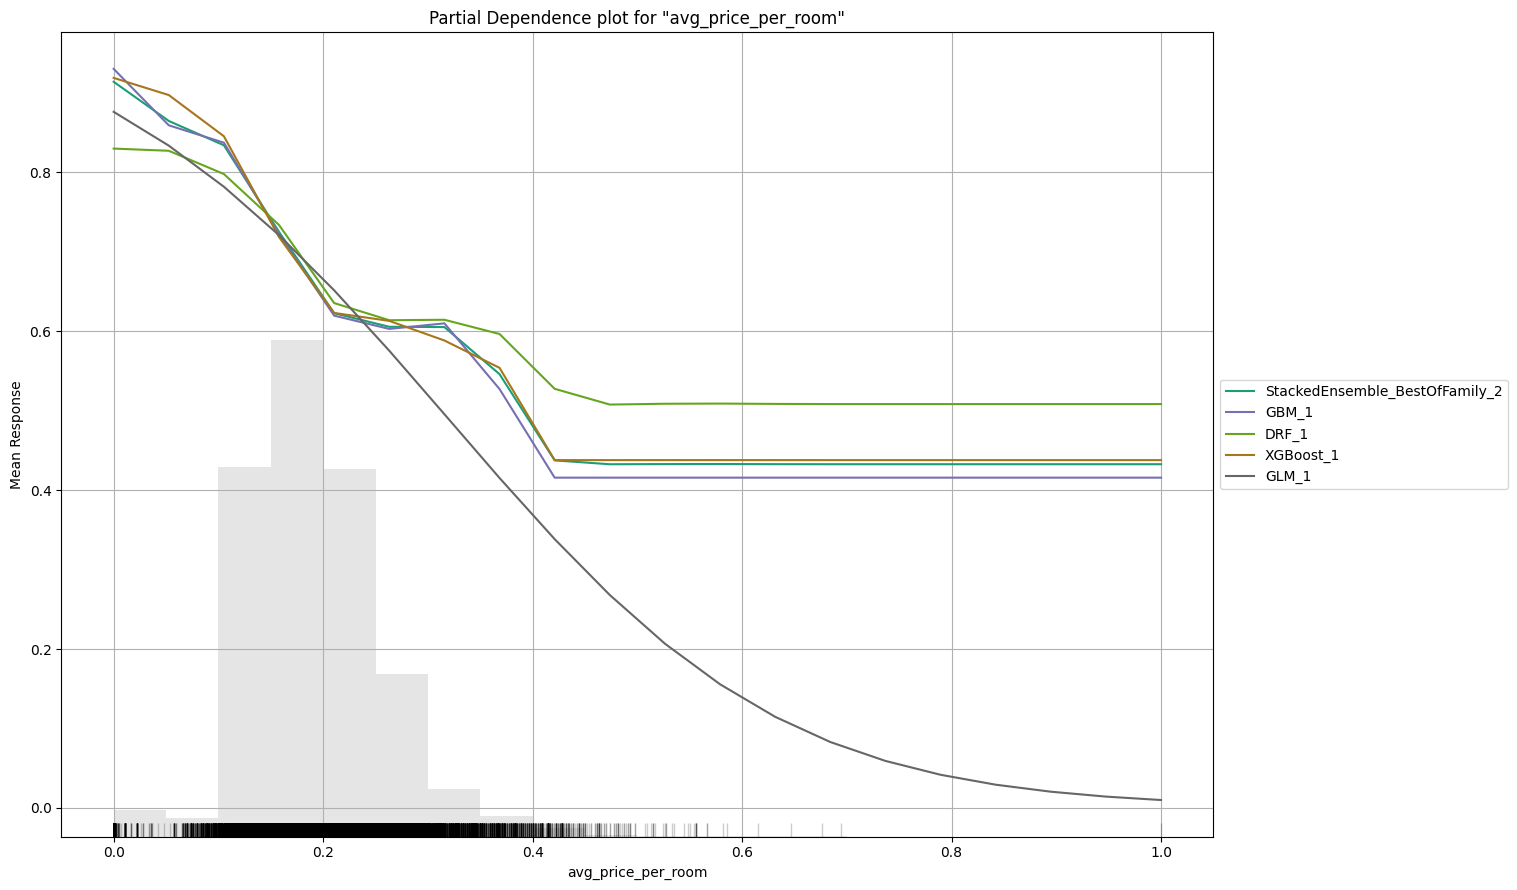

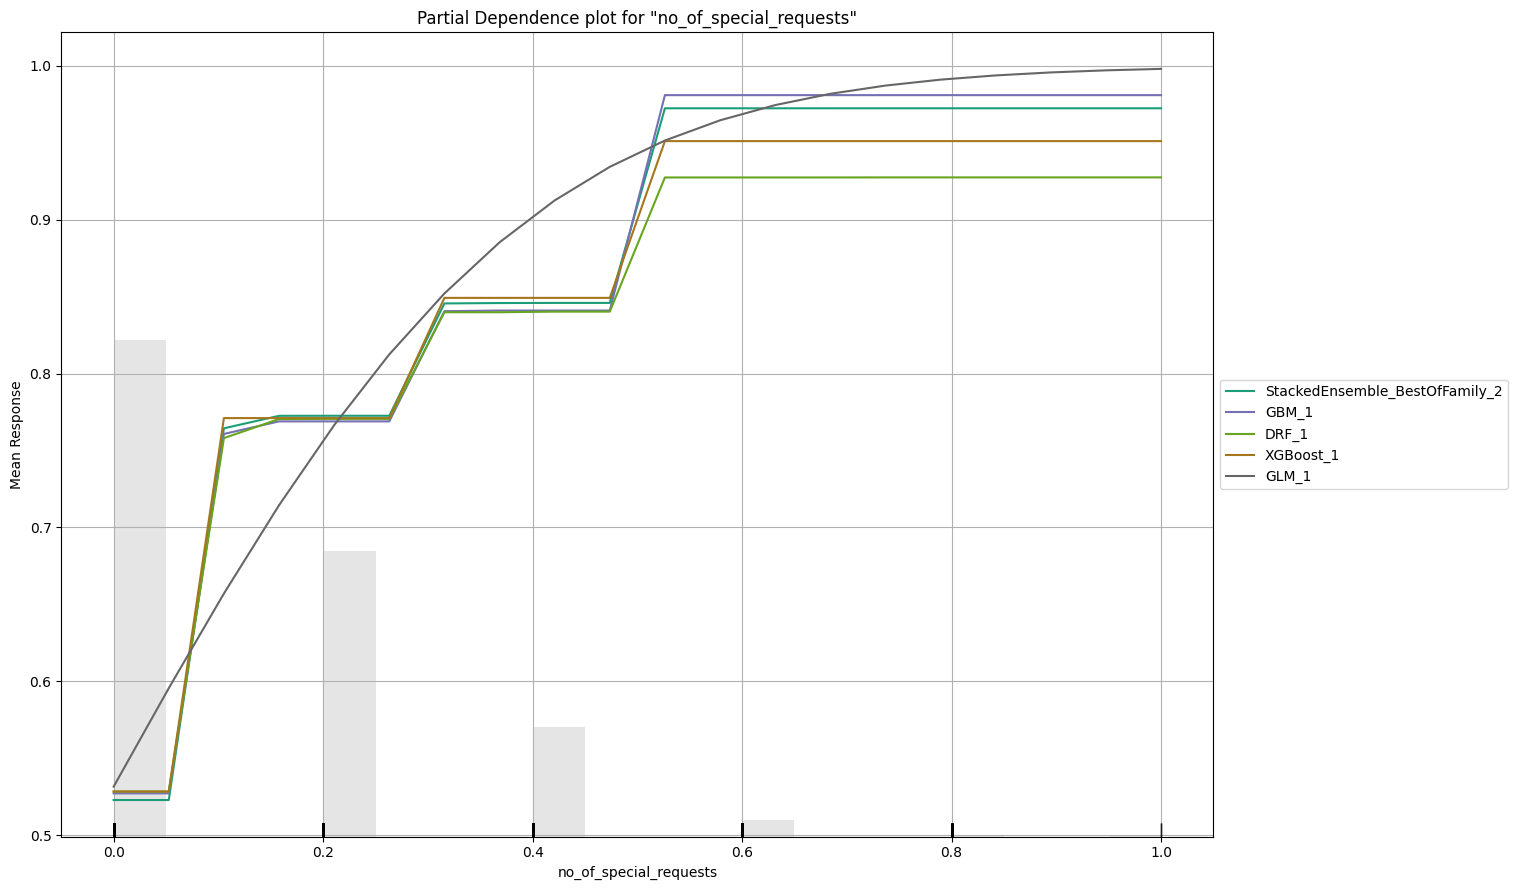

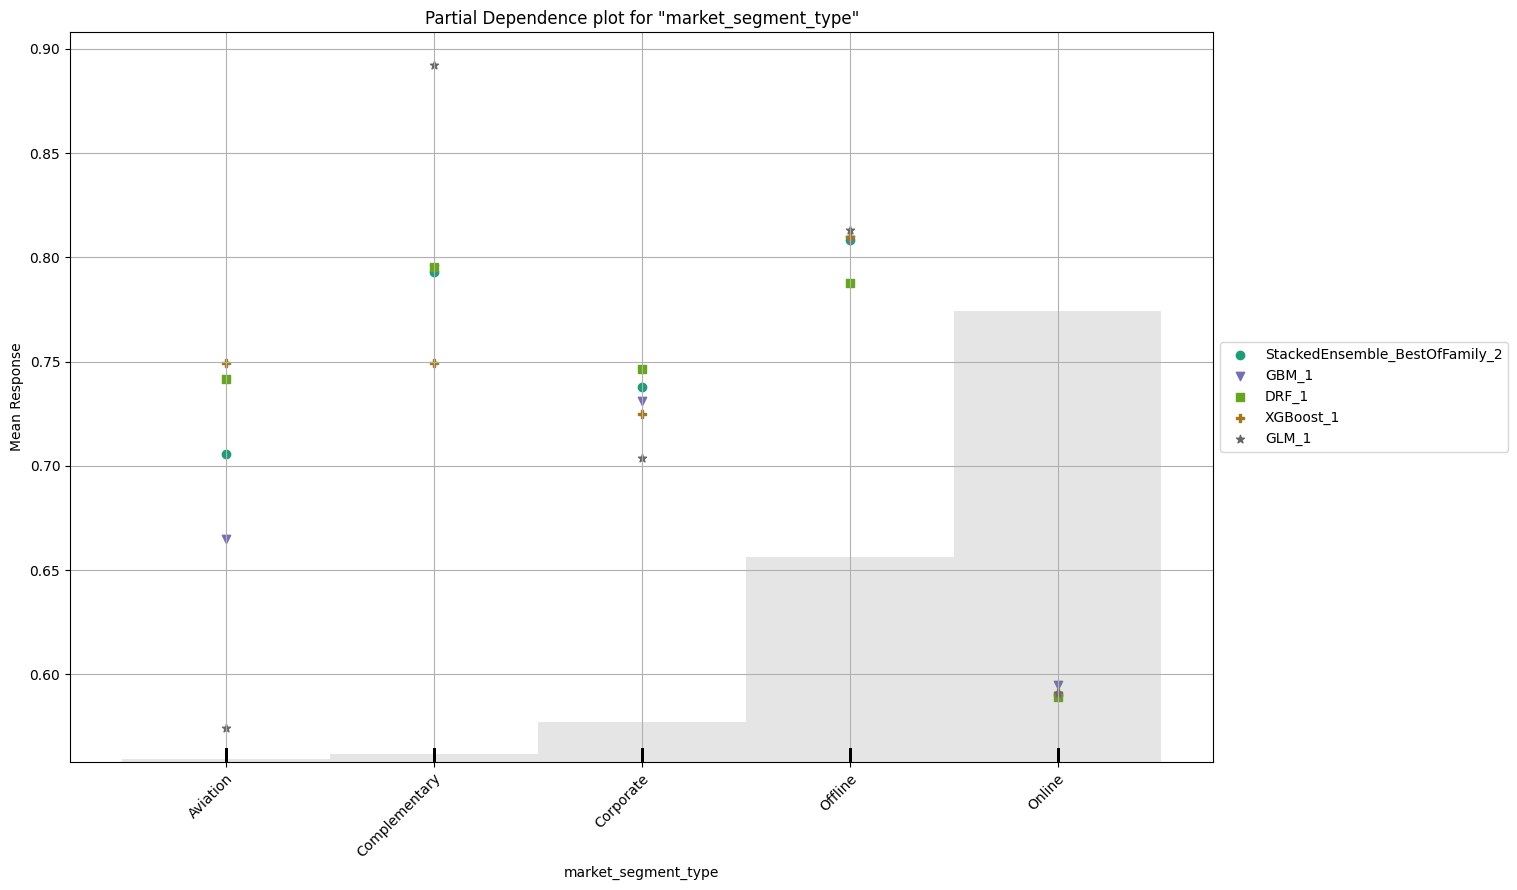

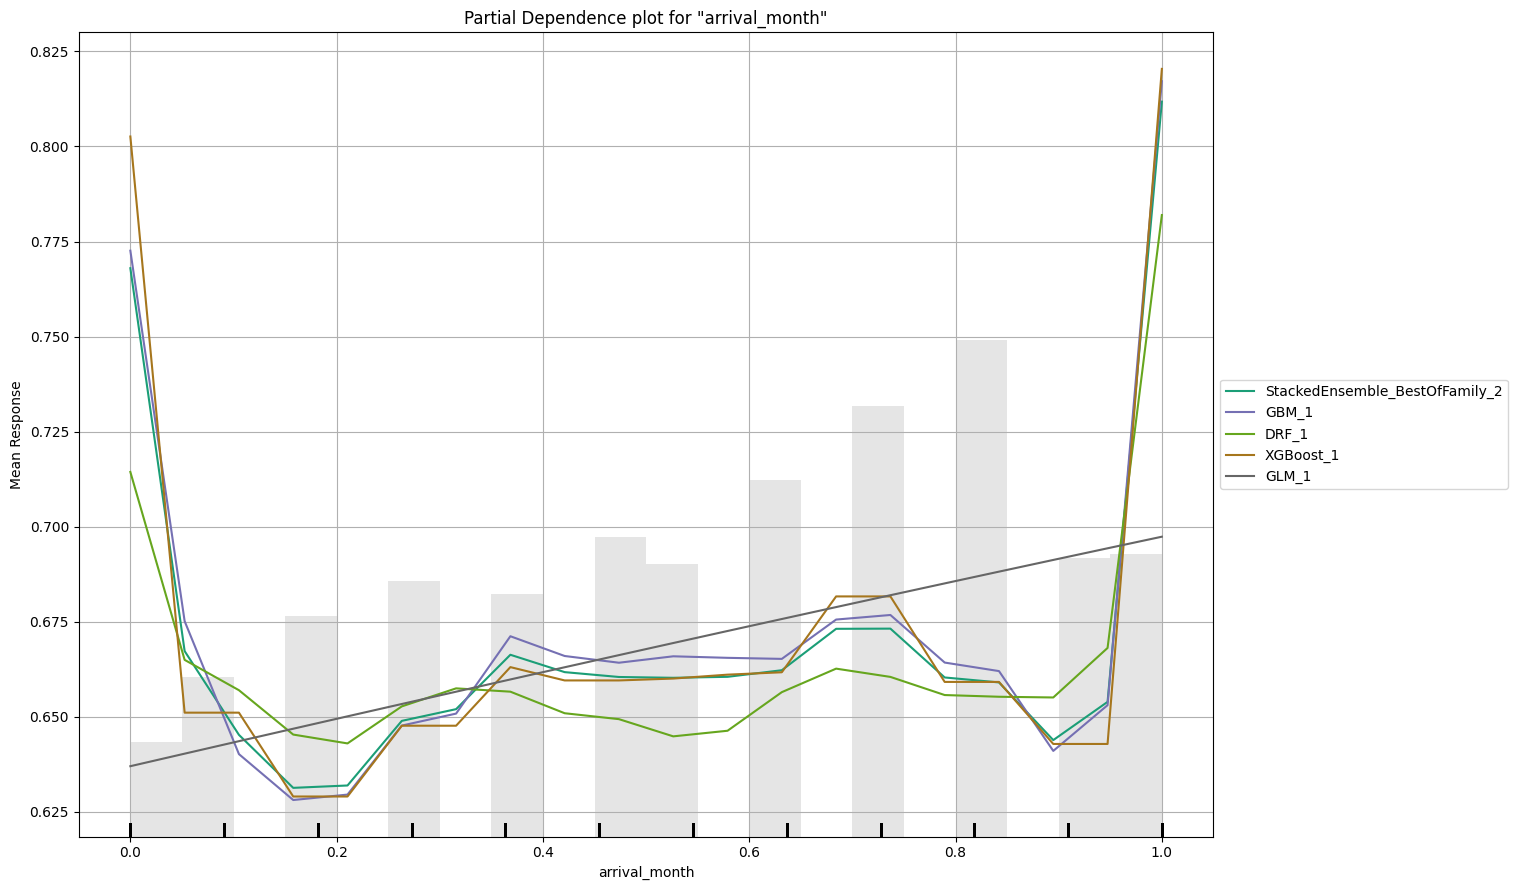

In [46]:
model_explain = aml.explain(data)

In [47]:
regressor = RandomForestRegressor()

## Hyperparameters
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

#Create the random grid
random_grid= {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


# Answer the following questions for all of the models:
## 1.Is the relationship significant?
Yes, the relationship is significant as the strength of evidence against the null hypothesis was less than 0.05. The results are statistically significant.

## 2.Are any model assumptions violated?
None of the assumptions are violated.

## 3.Is there any multicollinearity in the model?
Yes. I detected multicollinearity by analyzing the correlation matrix and by examining the p-values of all variables. In the present study, the OLS summary indicated that the p-values for multiple features were greater than 0.05, suggesting that these variables are not significant. Upon rechecking the values, the model met the expected output. Thus, it was concluded that these unnecessary variables were causing multicollinearity and their removal improved the model's performance.

## 4.In the multivariate models are predictor variables independent of all the other predictor variables?
By referring to correlation matrix and heat map, the variables were independent of all other predictor variables as none of the values were more than 0.2 or less than -0.2.

## 5.In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Most significant was age and most insignificant was engine among the numerical predictors.

## 6.Does the model make sense?
Yes somewhat. However, the model seems imperfect for the proposed solution as RMS and p-values are not as expected.

## 7.Does regularization help?
Not much, regularization would be ineffective.

## 8.Which independent variables are significant?
"no_of_adults" was the most significant.

## 9.Which hyperparameters are important?
To optimize the performance of the model, a RandomForestRegressor is employed. The hyperparameters used for tuning the model include 'max_depth' of 30, 'min_samples_split' of 2, and 'n_estimators' of 100.

# References

1. https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb


# Licensing:
MIT License

Copyright (c) 2024 sainikhilreddychalla

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.